In [ ]:
!pip install patchify

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from patchify import patchify
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
""" Read tabular data """
tabdata = pd.read_csv("/content/drive/MyDrive/Parknsontext/tabdatafull.csv")
tabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3420 non-null   int64  
 1   PATNO       3420 non-null   int64  
 2   NP1RTOT     3420 non-null   float64
 3   NP2PTOT     3420 non-null   float64
 4   NP3TOT      3420 non-null   float64
 5   NP4TOT      3414 non-null   float64
 6   CLASS       3420 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 187.2 KB


In [ ]:
tabdata = tabdata.fillna(0.0)
tabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3420 non-null   int64  
 1   PATNO       3420 non-null   int64  
 2   NP1RTOT     3420 non-null   float64
 3   NP2PTOT     3420 non-null   float64
 4   NP3TOT      3420 non-null   float64
 5   NP4TOT      3420 non-null   float64
 6   CLASS       3420 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 187.2 KB


In [ ]:
tabdata = tabdata.drop(tabdata.columns[0], axis=1)
tabdata.head()

,PATNO,NP1RTOT,NP2PTOT,NP3TOT,NP4TOT,CLASS
0,3000,0.0,0.0,5.0,0.0,0
1,3004,0.0,0.0,0.0,0.0,0
2,3006,2.0,12.0,33.0,0.0,1
3,3008,1.0,0.0,0.0,0.0,0
4,3009,2.0,1.0,0.0,0.0,0


In [ ]:
!pip install tensorflow-decision-forests


In [ ]:

import tensorflow_decision_forests as tfdf

split_size = int(len(tabdata) * .1)
train_tab_x, valid_tab_x = train_test_split(tabdata, test_size=split_size, random_state=42)
train_tab_x, test_tab_x = train_test_split(train_tab_x, test_size=split_size, random_state=42)


# Convert DataFrame to TensorFlow dataset (works directly with Pandas DataFrame)
train_tabds = tfdf.keras.pd_dataframe_to_tf_dataset(train_tab_x.iloc[:, 1:], label="CLASS")
valid_tabds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_tab_x.iloc[:, 1:], label="CLASS")
test_tabds = tfdf.keras.pd_dataframe_to_tf_dataset(test_tab_x.iloc[:, 1:], label="CLASS")



# Build a Gradient Descent model
gdmodel = tfdf.keras.GradientBoostedTreesModel()

# Train the model
gdmodel.fit(train_tabds,validation_data=valid_tabds)

# Display model summary
gdmodel.summary()

# Evaluate the model on the training data
evaluation = gdmodel.evaluate(valid_tabds)
print(f"Evaluation: {evaluation}")


Use /tmp/tmp5vy6_b2s as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.494076. Found 2736 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(342, shape=(), dtype=int32)
Validation dataset read in 0:00:00.217663. Found 342 examples.
Training model...
Model trained in 0:00:00.417146
Compiling model...
Model compiled.
Model: "gradient_boosted_trees_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	NP1RTOT
	NP2PTOT
	NP3TOT
	NP4TOT

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "NP3TOT"  0.587143 ################
    2. "NP2PTOT"  0.336011 ####
    3.  "NP4TOT"  0.273136 #

In [ ]:
prob = gdmodel.predict(test_tabds)

1/1 [==============================] - 0s 59ms/step


In [ ]:
pred = []
for i in range(len(prob)):
  if prob[i] > 0.5:
    pred.append(1)
  else:
    pred.append(0)
print(prob)
print(pred)

[[0.9166329 ]
 [0.00129241]
 [0.04147915]
 [0.00544557]
 [0.9211044 ]
 [0.00129241]
 [0.00129241]
 [0.00805577]
 [0.97712815]
 [0.00129241]
 [0.09333156]
 [0.00129241]
 [0.00921239]
 [0.00921239]
 [0.00129241]
 [0.00129241]
 [0.99616796]
 [0.0033652 ]
 [0.76409304]
 [0.9648375 ]
 [0.00129241]
 [0.0012924 ]
 [0.00119164]
 [0.85970634]
 [0.0139815 ]
 [0.00129241]
 [0.00119164]
 [0.02117255]
 [0.49637133]
 [0.9884013 ]
 [0.9831887 ]
 [0.00129241]
 [0.00113898]
 [0.00129241]
 [0.00129241]
 [0.954886  ]
 [0.00129241]
 [0.00129241]
 [0.00129241]
 [0.9909581 ]
 [0.9940943 ]
 [0.00129241]
 [0.00129241]
 [0.99601656]
 [0.00129241]
 [0.00129241]
 [0.9308284 ]
 [0.98951423]
 [0.00129241]
 [0.00129241]
 [0.00129241]
 [0.91962904]
 [0.00129241]
 [0.00129241]
 [0.00129241]
 [0.00129241]
 [0.0016901 ]
 [0.00129241]
 [0.00129241]
 [0.01502833]
 [0.99643576]
 [0.00119164]
 [0.00129241]
 [0.89856017]
 [0.001004  ]
 [0.00129241]
 [0.00119164]
 [0.09333156]
 [0.00129241]
 [0.00129241]
 [0.01426481]
 [0.00

In [ ]:
confusion_mtx = confusion_matrix(test_tab_x['CLASS'], pred)
confusion_mtx

array([[242,   9],
       [  4,  87]])

In [ ]:
precision = precision_score(test_tab_x['CLASS'], pred)
recall = recall_score(test_tab_x['CLASS'], pred)
f1score = f1_score(test_tab_x['CLASS'], pred)
accuracy = accuracy_score(test_tab_x['CLASS'], pred)
AUC = roc_auc_score(test_tab_x['CLASS'], pred)
print("AUC: ", AUC)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")
print(f"AUC: {AUC}")

AUC:  0.9600936911693885
Accuracy: 0.9619883040935673
Precision: 0.90625
Recall: 0.9560439560439561
F1 Score: 0.93048128342246
AUC: 0.9600936911693885


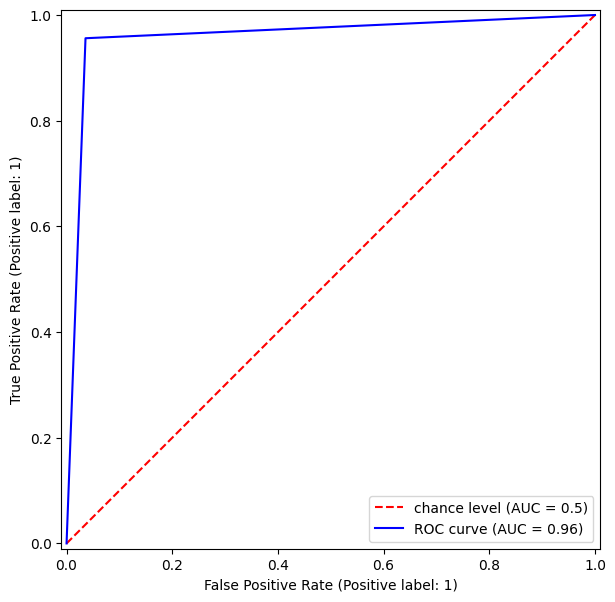

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot([0, 1], [0, 1], "r--", label="chance level (AUC = 0.5)")
color = "blue"
RocCurveDisplay.from_predictions(
		test_tab_x['CLASS'],
    pred,
		name= "ROC curve",
		color=color,
		ax=ax,
	)

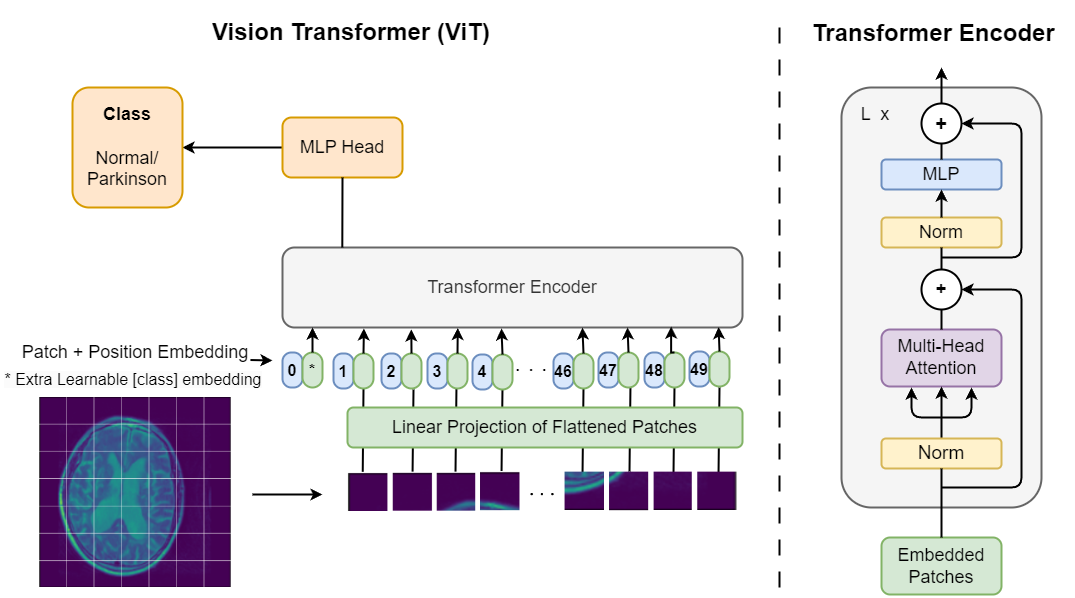

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from patchify import patchify
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping


In [ ]:
# Hyperparameters
hp = {}
hp["image_size"] = 224
hp["num_channels"] = 1
hp["patch_size"] = 32
hp["num_patches"] = (hp["image_size"]**2) // (hp["patch_size"]**2)
hp["flat_patches_shape"] = (hp["num_patches"], hp["patch_size"]*hp["patch_size"]*hp["num_channels"])

hp["batch_size"] = 32
hp["lr"] = 1e-4
hp["num_epochs"] = 10
hp["num_classes"] = 2
hp["class_names"] = ["normal","parkinson"]

hp["num_layers"] = 4
hp["hidden_dim"] = 768
hp["mlp_dim"] = 3072
hp["num_heads"] = 12
hp["dropout_rate"] = 0.1
hp["num_tab_features"] = 4

In [ ]:
class ClassToken(Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

In [ ]:
def mlp(x, cf):
    x = Dense(cf["mlp_dim"], activation="gelu")(x)
    x = Dropout(cf["dropout_rate"])(x)
    x = Dense(cf["hidden_dim"])(x)
    x = Dropout(cf["dropout_rate"])(x)
    return x

In [ ]:
def transformer_encoder(x, cf):
    skip_1 = x
    x = LayerNormalization()(x)
    x = MultiHeadAttention(
        num_heads=cf["num_heads"], key_dim=cf["hidden_dim"]
    )(x, x)
    x = Add()([x, skip_1])

    skip_2 = x
    x = LayerNormalization()(x)
    x = mlp(x, cf)
    x = Add()([x, skip_2])

    return x

In [ ]:
def ViT(cf):
    """ Inputs """
    input_shape = (cf["num_patches"], cf["patch_size"]*cf["patch_size"]*cf["num_channels"])
    inputs = Input(input_shape)     ## (None, 49, 1024)

    """ Patch + Position Embeddings """
    patch_embed = Dense(cf["hidden_dim"])(inputs)   ## (None, 49, 768)

    positions = tf.range(start=0, limit=cf["num_patches"], delta=1)
    pos_embed = Embedding(input_dim=cf["num_patches"], output_dim=cf["hidden_dim"])(positions) ## (256, 768)
    embed = patch_embed + pos_embed ## (None, 49, 768)

    """ Adding Class Token """
    token = ClassToken()(embed)
    x = Concatenate(axis=1)([token, embed]) ## (None, 50, 768)

    for _ in range(cf["num_layers"]):
        x = transformer_encoder(x, cf)

    """ Classification Head """
    x = LayerNormalization()(x)     ## (None, 50, 768)
    x = x[:, 0, :]
    x = Dense(cf["num_classes"], activation="softmax")(x)

    model = Model(inputs, x)
    return model

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_data(path, split=0.25):
    #print(path)
    #print(glob(os.path.join(path, "*", "*.png")))
    images = shuffle(glob(os.path.join(path, "*", "*.png")))
    #print(len(images))

    split_size = int(len(images) * split)
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    return train_x, valid_x, test_x

In [ ]:
def process_image_label(path):
    """ Reading images """
    path = path.decode()
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (hp["image_size"], hp["image_size"]))
    image = image/255.0

    """ Preprocessing to patches """
    patch_shape = (hp["patch_size"], hp["patch_size"], hp["num_channels"])
    patches = patchify(image, patch_shape, hp["patch_size"])

    # patches = np.reshape(patches, (64, 25, 25, 3))
    # for i in range(64):
    #     cv2.imwrite(f"files/{i}.png", patches[i])

    patches = np.reshape(patches, hp["flat_patches_shape"])
    patches = patches.astype(np.float32)

    """ Label """
    class_name = path.split("/")[-2]
    class_idx = hp["class_names"].index(class_name)
    class_idx = np.array(class_idx, dtype=np.int32)

    return patches, class_idx

In [ ]:
def parse(path):
    patches, labels = tf.numpy_function(process_image_label, [path], [tf.float32, tf.int32])
    labels = tf.one_hot(labels, hp["num_classes"])

    patches.set_shape(hp["flat_patches_shape"])
    labels.set_shape(hp["num_classes"])

    return patches, labels

def tf_dataset(images, batch=32):
    ds = tf.data.Dataset.from_tensor_slices((images))
    ds = ds.map(parse).batch(batch).prefetch(8)
    return ds

In [ ]:
""" Seeding """
np.random.seed(42)
tf.random.set_seed(42)

""" Directory for storing files """
create_dir("files")

""" Paths """
dataset_path = "/content/drive/MyDrive/parkinsons/parkinsons_dataset"
model_path = os.path.join("files", "vitmodel.keras")
csv_path = os.path.join("files", "log.csv")

In [ ]:
""" Dataset """
train_x, valid_x, test_x = load_data(dataset_path)
print(f"Train: {len(train_x)} - Valid: {len(valid_x)} - Test: {len(test_x)}")

train_ds = tf_dataset(train_x, batch=hp["batch_size"])
valid_ds = tf_dataset(valid_x, batch=hp["batch_size"])

""" Model """
vitmodel = ViT(hp)
vitmodel.summary()

Train: 417 - Valid: 207 - Test: 207


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 49, 1024)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 49, 768)        │        787,200 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 49, 768)        │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ class_token_1             │ (None, 1, 768)         │              0 │ add_9[0][0]            │
│ (ClassToken)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 50, 768)        │              0 │ class_token_1[0][0],   │
│ (Concatenate)             │                        │                │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 50, 768)        │          1,536 │ concatenate_1[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_4    │ (None, 50, 768)        │     28,339,968 │ layer_normalization_9… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 50, 768)        │              0 │ multi_head_attention_… │
│                           │                        │                │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_10    │ (None, 50, 768)        │          1,536 │ add_10[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 50, 3072)       │      2,362,368 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 50, 3072)       │              0 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 50, 768)        │      2,360,064 │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 50, 768)        │              0 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 50, 768)        │              0 │ dropout_14[0][0],      │
│                           │                        │                │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_11    │ (None, 50, 768)        │          1,536 │ add_11[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 133,052,162 (507.55 MB)

 Trainable params: 133,052,162 (507.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vitmodel.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(hp["lr"], clipvalue=1.0),
    metrics=["acc"]
)

callbacks = [
    ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-10, verbose=1),
    CSVLogger(csv_path),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False),
    ]

vitmodel.fit(
    train_ds,
    epochs=hp["num_epochs"],
    validation_data=valid_ds,
    callbacks=callbacks
)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - acc: 0.5764 - loss: 4.2358  
Epoch 1: val_loss improved from inf to 0.61274, saving model to files/vitmodel.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1038s 71s/step - acc: 0.5749 - loss: 4.1226 - val_acc: 0.7198 - val_loss: 0.6127 - learning_rate: 1.0000e-04
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 59s/step - acc: 0.7367 - loss: 0.6259  
Epoch 2: val_loss did not improve from 0.61274
14/14 ━━━━━━━━━━━━━━━━━━━━ 981s 70s/step - acc: 0.7330 - loss: 0.6287 - val_acc: 0.5362 - val_loss: 0.6797 - learning_rate: 1.0000e-04
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 59s/step - acc: 0.6252 - loss: 0.6281  
Epoch 3: val_loss did not improve from 0.61274
14/14 ━━━━━━━━━━━━━━━━━━━━ 928s 66s/step - acc: 0.6255 - loss: 0.6304 - val_acc: 0.7198 - val_loss: 0.6136 - learning_rate: 1.0000e-04
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - acc: 0.7562 - loss: 0.5829  
Epoch 4: val_loss improved from 0.61274 to 0.59275, saving model to files/vitmodel.keras
14

In [ ]:
import matplotlib.pyplot as plt

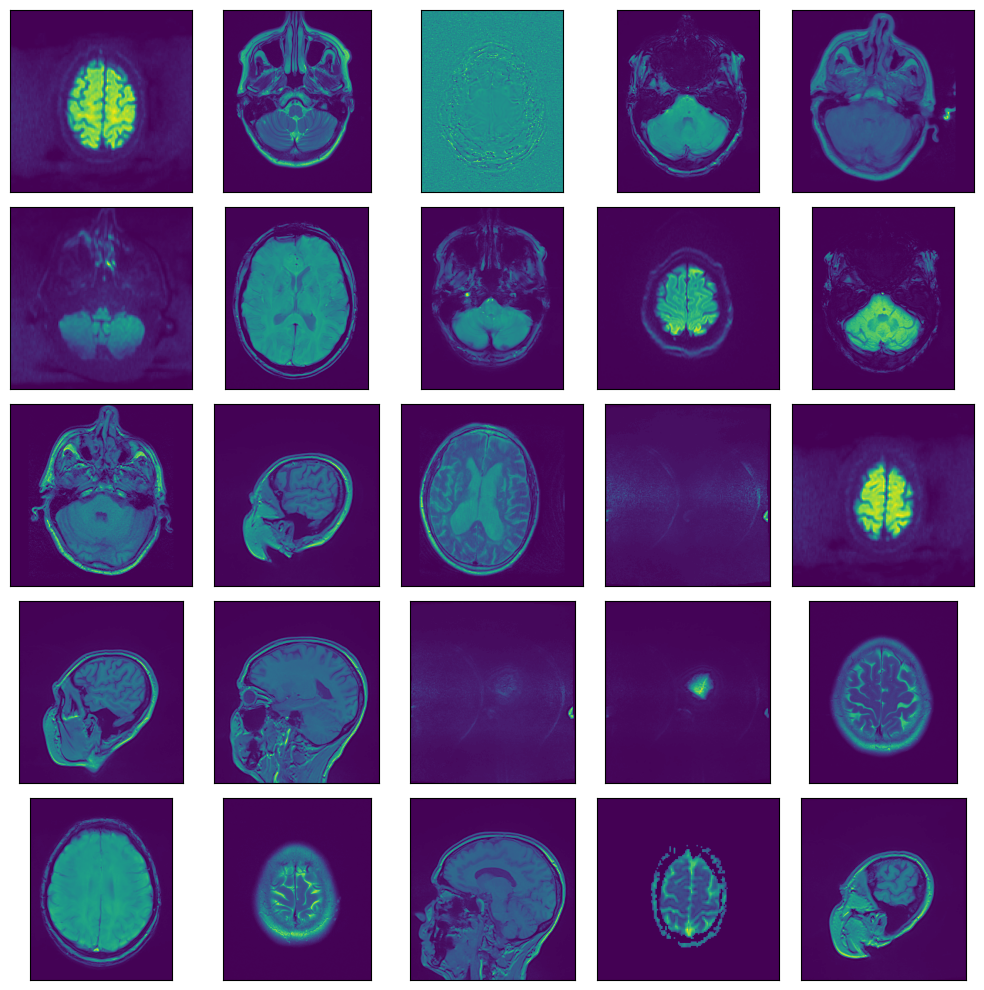

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_x[i]))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
history = pd.read_csv("/content/files/log.csv")

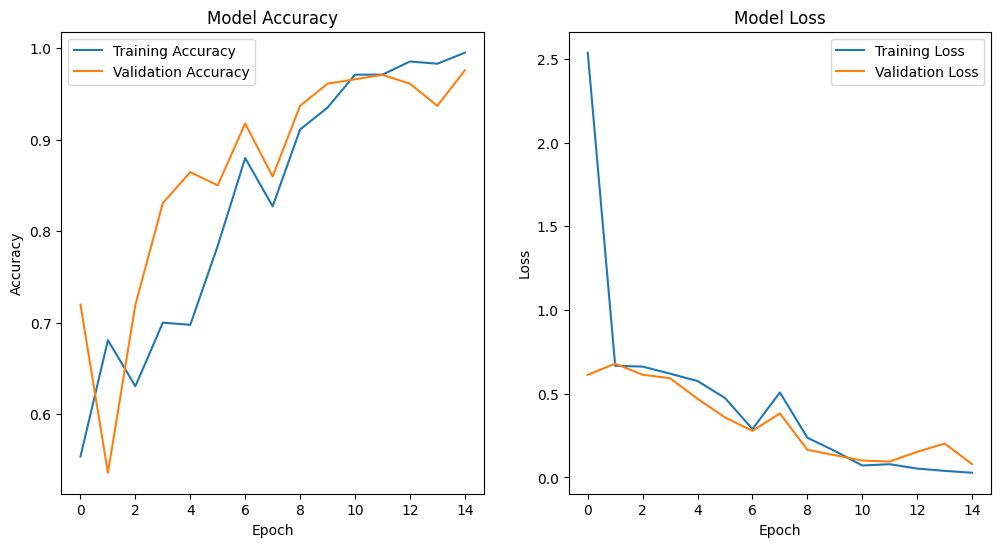

In [ ]:
def loss_history_plot(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history["acc"], label="Training Accuracy")
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

loss_history_plot(history)

In [ ]:
test_ds = tf_dataset(test_x, batch=hp["batch_size"])
vitmodel.evaluate(test_ds)

In [ ]:
test_ds

In [ ]:
imgpred = vitmodel.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 125s 16s/step


In [ ]:
!cp /content/files/log.csv /content/drive/MyDrive/parkinsons

In [ ]:
!cp /content/files/vitmodel.keras /content/drive/MyDrive/parkinsons

In [ ]:
test_df = pd.DataFrame(test_x)
test_df.to_csv("/content/drive/MyDrive/parkinsons/test.csv")

In [ ]:
test_df

,0
0,/content/drive/MyDrive/parkinsons/parkinsons_d...
1,/content/drive/MyDrive/parkinsons/parkinsons_d...
2,/content/drive/MyDrive/parkinsons/parkinsons_d...
3,/content/drive/MyDrive/parkinsons/parkinsons_d...
4,/content/drive/MyDrive/parkinsons/parkinsons_d...
...,...
202,/content/drive/MyDrive/parkinsons/parkinsons_d...
203,/content/drive/MyDrive/parkinsons/parkinsons_d...
204,/content/drive/MyDrive/parkinsons/parkinsons_d...
205,/content/drive/MyDrive/parkinsons/parkinsons_d...


In [ ]:
imgpred_df = pd.DataFrame(imgpred)
imgpred_df.to_csv("/content/drive/MyDrive/parkinsons/imgpred.csv")

In [ ]:
train_df = pd.DataFrame(train_x)
train_df.to_csv("/content/drive/MyDrive/parkinsons/train.csv")

In [ ]:
imgpred_df = pd.read_csv("/content/drive/MyDrive/parkinsons/imgpred.csv")

In [ ]:
#predictions = [1 if float(x)>0.5 else 0 for x in predictions[0]]
imgpred_df.columns=['id','normal','parkinson']

In [ ]:
imgpred_df

,id,normal,parkinson
0,0,0.997375,0.002625
1,1,0.979161,0.020839
2,2,0.000096,0.999904
3,3,0.944869,0.055131
4,4,0.000054,0.999946
...,...,...,...
202,202,0.992427,0.007573
203,203,0.998351,0.001649
204,204,0.999969,0.000031
205,205,0.999967,0.000033


In [ ]:
imgpred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         207 non-null    int64  
 1   normal     207 non-null    float64
 2   parkinson  207 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.0 KB


In [ ]:
def classify(x):
  if x > 0.5:
    disease = 'normal'
  else:
    disease = 'parkinson'
  return disease

imgpred_df['disease'] = imgpred_df['normal'].apply(classify)

In [ ]:
imgpred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         207 non-null    int64  
 1   normal     207 non-null    float64
 2   parkinson  207 non-null    float64
 3   disease    207 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/parkinsons/test.csv")
test_df.head()

,Unnamed: 0,0
0,0,/content/drive/MyDrive/parkinsons/parkinsons_d...
1,1,/content/drive/MyDrive/parkinsons/parkinsons_d...
2,2,/content/drive/MyDrive/parkinsons/parkinsons_d...
3,3,/content/drive/MyDrive/parkinsons/parkinsons_d...
4,4,/content/drive/MyDrive/parkinsons/parkinsons_d...


In [ ]:
test_df.columns = ['id','path']

In [ ]:
test_df

,id,path
0,0,/content/drive/MyDrive/parkinsons/parkinsons_d...
1,1,/content/drive/MyDrive/parkinsons/parkinsons_d...
2,2,/content/drive/MyDrive/parkinsons/parkinsons_d...
3,3,/content/drive/MyDrive/parkinsons/parkinsons_d...
4,4,/content/drive/MyDrive/parkinsons/parkinsons_d...
...,...,...
202,202,/content/drive/MyDrive/parkinsons/parkinsons_d...
203,203,/content/drive/MyDrive/parkinsons/parkinsons_d...
204,204,/content/drive/MyDrive/parkinsons/parkinsons_d...
205,205,/content/drive/MyDrive/parkinsons/parkinsons_d...


In [ ]:
def label(path):
  path_split = path.split('/')
  return path_split[-2]

test_df['disease'] = test_df['path'].apply(label)
test_df

,id,path,disease
0,0,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
1,1,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
2,2,/content/drive/MyDrive/parkinsons/parkinsons_d...,parkinson
3,3,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
4,4,/content/drive/MyDrive/parkinsons/parkinsons_d...,parkinson
...,...,...,...
202,202,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
203,203,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
204,204,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal
205,205,/content/drive/MyDrive/parkinsons/parkinsons_d...,normal


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
confusion_mtx = confusion_matrix(test_df['disease'], imgpred_df['disease'])
confusion_mtx

array([[143,   2],
       [  5,  57]])

In [ ]:
precision = precision_score(test_df['disease'], imgpred_df['disease'], labels=['parkinson'], average=None)
recall = recall_score(test_df['disease'], imgpred_df['disease'], labels=['parkinson'], average=None)
f1score = f1_score(test_df['disease'], imgpred_df['disease'], labels=['parkinson'], average=None)
AUC = roc_auc_score(test_df['disease'], imgpred_df['parkinson'])

print(" Image Prediction")
print ("precision: ", precision)
print("recall: ", recall)
print("f1-score: ", f1score)
print("AUC: ", AUC)

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

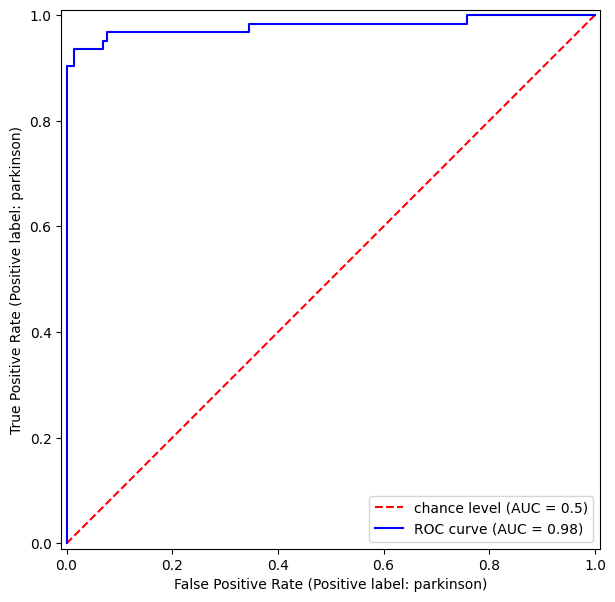

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot([0, 1], [0, 1], "r--", label="chance level (AUC = 0.5)")
color = "blue"
RocCurveDisplay.from_predictions(
		test_df['disease'],
		imgpred_df['parkinson'],
    pos_label = "parkinson",
		name= "ROC curve",
		color=color,
		ax=ax,
	)

In [ ]:
def extract_patnos(filelist):
  patnos = []
  for filepath in filelist:
    # Extract PATNO
    patno = filepath.split('/')[-1].split('.')[0]
    patnos.append(int(patno))
  return patnos

In [ ]:
def tf_tabdata(filelist):
  patnos = extract_patnos(filelist)
  features = tabdata[tabdata['PATNO'].isin(patnos)][['NP1RTOT','NP2PTOT', 'NP3TOT', 'NP4TOT']]
  labels = tabdata[tabdata['PATNO'].isin(patnos)][['CLASS']]
  df = pd.DataFrame()
  ds = tfdf.keras.pd_dataframe_to_tf_dataset()
  ds = ds.batch(batch).prefetch(8)
  return ds

In [ ]:
patnos = extract_patnos(test_df['path'])
df = tabdata[tabdata['PATNO'].isin(patnos)]
test_tabdf = df.set_index('PATNO').reindex(patnos).reset_index()

In [ ]:
test_tabds = tfdf.keras.pd_dataframe_to_tf_dataset(test_tabdf.iloc[:, 1:], label="CLASS")

In [ ]:
test_tabds

<_PrefetchDataset element_spec=({'NP1RTOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'NP2PTOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'NP3TOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'NP4TOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
tabprobs = gdmodel.predict(test_tabds)

1/1 [==============================] - 0s 75ms/step


In [ ]:
tabprobs

array([[0.00129241],
       [0.00129241],
       [0.90661037],
       [0.00129241],
       [0.9677669 ],
       [0.00129241],
       [0.8313049 ],
       [0.00129241],
       [0.9786542 ],
       [0.00129241],
       [0.0016901 ],
       [0.00129241],
       [0.46693778],
       [0.00129241],
       [0.9718787 ],
       [0.00129241],
       [0.9600622 ],
       [0.00129241],
       [0.8085811 ],
       [0.977103  ],
       [0.00119164],
       [0.91219705],
       [0.00119164],
       [0.00129241],
       [0.00129241],
       [0.00129241],
       [0.9744916 ],
       [0.00129241],
       [0.97103035],
       [0.0012924 ],
       [0.00116793],
       [0.02117255],
       [0.3418685 ],
       [0.00129241],
       [0.28987962],
       [0.00129241],
       [0.00129241],
       [0.9851657 ],
       [0.00117628],
       [0.02117255],
       [0.96969897],
       [0.92584753],
       [0.00129241],
       [0.9963134 ],
       [0.89503306],
       [0.00117647],
       [0.02096226],
       [0.001

In [ ]:
mmprobs = list([(x + y) / 2 for x, y in zip(tabprobs, imgpred_df['parkinson'])])
mmprobs

[array([0.00195862], dtype=float32),
 array([0.01106553], dtype=float32),
 array([0.9532573], dtype=float32),
 array([0.02821151], dtype=float32),
 array([0.9838563], dtype=float32),
 array([0.00111001], dtype=float32),
 array([0.44504842], dtype=float32),
 array([0.00114697], dtype=float32),
 array([0.9893224], dtype=float32),
 array([0.00441989], dtype=float32),
 array([0.00567568], dtype=float32),
 array([0.09163782], dtype=float32),
 array([0.23351838], dtype=float32),
 array([0.00219013], dtype=float32),
 array([0.98590404], dtype=float32),
 array([0.00699898], dtype=float32),
 array([0.96468484], dtype=float32),
 array([0.00147107], dtype=float32),
 array([0.46171802], dtype=float32),
 array([0.98847854], dtype=float32),
 array([0.02454924], dtype=float32),
 array([0.95607656], dtype=float32),
 array([0.00203563], dtype=float32),
 array([0.00069322], dtype=float32),
 array([0.00103097], dtype=float32),
 array([0.00105412], dtype=float32),
 array([0.9872334], dtype=float32),
 arra

In [ ]:
def multimodalpred(prob1,prob2):
  mmpred = []
  if len(prob1) <= len(prob2):
    for i in range(len(prob1)):
      if (prob1[i]+prob2[i])/2 > 0.5:
        mmpred.append(1)
      else:
        mmpred.append(0)
  return mmpred

mmpred = multimodalpred(tabprobs, imgpred_df['parkinson'])

In [ ]:
precision = precision_score(test_tabdf['CLASS'], mmpred)
recall = recall_score(test_tabdf['CLASS'], mmpred)
f1score = f1_score(test_tabdf['CLASS'], mmpred)
accuracy = accuracy_score(test_tabdf['CLASS'], mmpred)
AUC = roc_auc_score(test_tabdf['CLASS'], mmpred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")
print(f"AUC: {AUC}")

Accuracy: 0.9855072463768116
Precision: 1.0
Recall: 0.9516129032258065
F1 Score: 0.9752066115702479
AUC: 0.9758064516129032


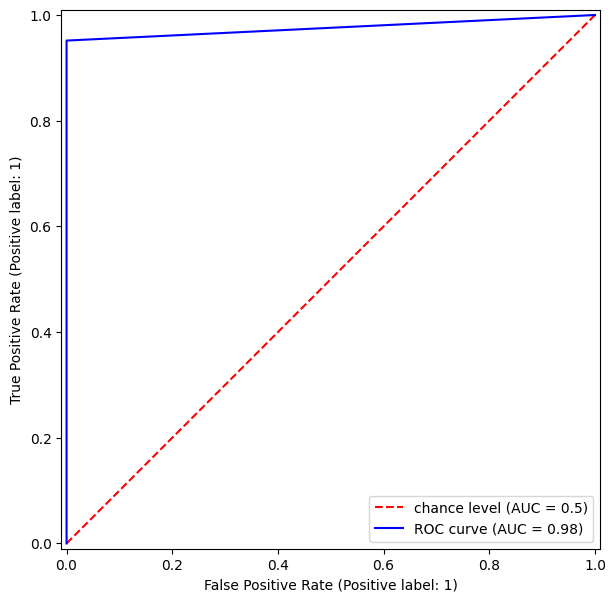

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.plot([0, 1], [0, 1], "r--", label="chance level (AUC = 0.5)")
color = "blue"
RocCurveDisplay.from_predictions(
		test_tabdf['CLASS'],
    mmpred,
		name= "ROC curve",
		color=color,
		ax=ax,
	)